In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

import numpy as np
import mglearn
cancer = load_breast_cancer()
logreg = LogisticRegression(max_iter=100)
scores = cross_val_score(logreg, cancer.data, cancer.target, cv = 5)
print("Cross validation scores: {}".format(scores))

Cross validation scores: [0.92982456 0.93859649 0.96491228 0.95614035 0.95575221]


D:\Projects\Big_Data_5_semester\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Projects\Big_Data_5_semester\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

In [4]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
print("Значения правильности перекростной проверки: \n{}".format(cross_val_score(logreg, cancer.data, cancer.target, cv=kfold)))


Значения правильности перекростной проверки: 
[0.9122807  0.93859649 0.97368421 0.95614035 0.95575221]


D:\Projects\Big_Data_5_semester\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Projects\Big_Data_5_semester\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
print("Размер обучающего набора: {} размер тестового набора: {}".format(X_train.shape[0], X_test.shape[0]))
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 100]:
    for C in [0.001, 0.01, 0.1, 1, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)

        score = svm.score(X_test, y_test)

        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
svm = SVC(**best_parameters)
svm.fit(X_train, y_train)
test_score = svm.score(X_test, y_test)
print("Наилучшее значение правильность: {:.2f}".format(best_score))
print("Наилушчее значение параметров: {}".format(best_parameters))

Размер обучающего набора: 426 размер тестового набора: 143
Наилучшее значение правильность: 0.93
Наилушчее значение параметров: {'C': 1, 'gamma': 0.001}


In [6]:
#Решетчетый поиск с перекрестной проверкой
import numpy as np
for gamma in [0.001, 0.01, 0.1, 1, 100]:
    for C in [0.001, 0.01, 0.1, 1, 100]:
        svm = SVC(gamma=gamma, C=C)
        scores = cross_val_score(svm, X_train, y_train, cv=5)
        score = np.mean(scores)


        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

svm = SVC(**best_parameters)
svm.fit(X_train, y_train)


SVC(C=1, gamma=0.001)

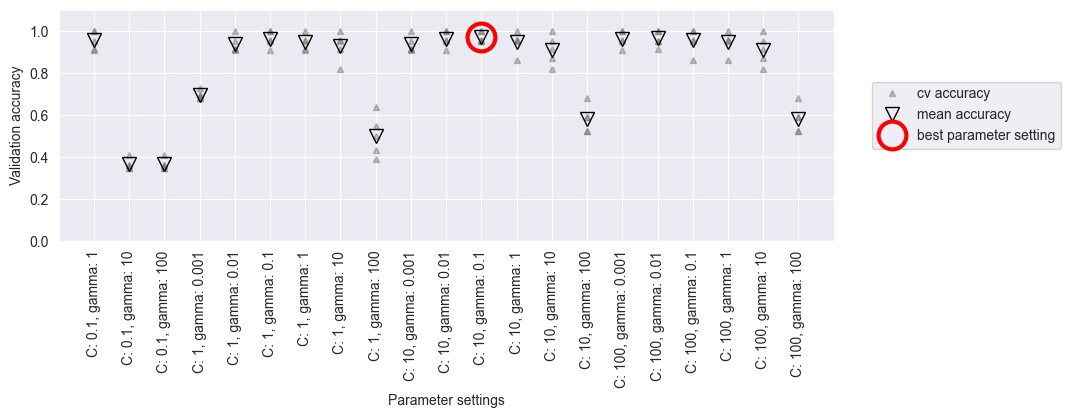

In [7]:
mglearn.plots.plot_cross_val_selection()

In [8]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Сетка параметров:\n{}".format(param_grid))

Сетка параметров:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [10]:
X_train, X_test, y_test, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [11]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [12]:
print("Правильность на тестовом наборе: {:.2f}".format(grid_search.score(X_test, y_test)))

Правильность на тестовом наборе: 0.93


In [13]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 1, 'gamma': 0.001}
0.9223803009575923


In [14]:
print("Наилучшая модель:\n{}".format(grid_search.best_estimator_))

Наилучшая модель:
SVC(C=1, gamma=0.001)


In [15]:
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003104,0.006208,0.005307,0.006686,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,6
1,0.005199,0.001472,0.002800,0.000751,0.001,0.010,"{'C': 0.001, 'gamma': 0.01}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,6
2,0.005729,0.005754,0.000645,0.001291,0.001,0.100,"{'C': 0.001, 'gamma': 0.1}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,6
3,0.006250,0.007654,0.000000,0.000000,0.001,1.000,"{'C': 0.001, 'gamma': 1}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,6
4,0.009375,0.007655,0.001301,0.002603,0.001,10.000,"{'C': 0.001, 'gamma': 10}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,6


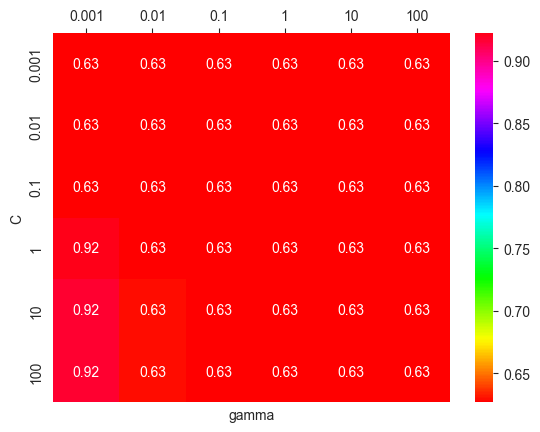

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
scores = np.array(results.mean_test_score).reshape(6, 6)

ax = sns.heatmap(scores, annot=True, xticklabels=param_grid['gamma'], yticklabels=param_grid['C'],cmap='hsv')
ax.set(xlabel="gamma", ylabel="C")
ax.xaxis.tick_top()
plt.show()

In [17]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [18]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Наилучшие значения параметров: {}".format(grid_search.best_params_))
print("Наилучшее значение кросс-валидац. правильности: {:.2f}".format(grid_search.best_score_))

Наилучшие значения параметров: {'C': 0.1, 'kernel': 'linear'}
Наилучшее значение кросс-валидац. правильности: 0.96


In [18]:
results = pd.DataFrame(grid_search.cv_results_)

In [19]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004434,0.006119,0.000000,0.000000,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,12
1,0.007581,0.007007,0.000669,0.001338,0.001,0.010,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,12
2,0.006276,0.007687,0.000000,0.000000,0.001,0.100,rbf,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,12
3,0.003123,0.006246,0.002427,0.004854,0.001,1.000,rbf,"{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,12
4,0.000000,0.000000,0.006251,0.007656,0.001,10.000,rbf,"{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,12
5,0.009375,0.007655,0.000000,0.000000,0.001,100.000,rbf,"{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,12
6,0.004733,0.003753,0.000000,0.000000,0.010,0.001,rbf,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,12
7,0.004322,0.004321,0.002303,0.003960,0.010,0.010,rbf,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,12
8,0.008667,0.007784,0.002112,0.003220,0.010,0.100,rbf,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,12
9,0.010646,0.002335,0.007598,0.005218,0.010,1.000,rbf,"{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,12


In [ ]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), cancer.data, cancer.target, cv=5)
print("Значение правильности перекрестной проверки: ", scores)
print("Среднее значение правильности перекрестной проверки: ", scores.mean())

In [19]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # для каждого разбиения данных во внешней перекрестной проверке 
    # (метод split возвращает индексы)   
    for training_samples, test_samples in outer_cv.split(X, y):
        # находим наилучшие параметры с помощью внутренней перекрестной проверки  
        best_parms = {}
        best_score = -np.inf
        # итерируем по параметрам   
        for parameters in parameter_grid:
             # собираем значения правильности по всем внутренним разбиениям 
            cv_scores = []
             # итерируем по разбиениям внутренней перекрестной проверки 
            for inner_train, inner_test in inner_cv.split(
                    X[training_samples], y[training_samples]):
                # строим классификатор с данными параметрами на внутреннем обучающем наборе
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
               # оцениваем качество на внутреннем тестовом наборе
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # вычисляем среднее значение правильности по внутренним блокам
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # если лучше, чем предыдущие, запоминаем параметры 
                best_score = mean_score
                best_params = parameters
        # строим классификатор с лучшими параметрами на внешнем обучающем наборе
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # оцениваем качество на внешнем тестовом наборе 
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)


In [20]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(cancer.data, cancer.target, StratifiedKFold(5), StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("Значения правильности перекростной проверки: {}".format(scores))

Значения правильности перекростной проверки: [0.93859649 0.93859649 0.97368421 0.94736842 0.95575221]


In [21]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("правильность dummy: {:.2f}".format(dummy.score(X_test, y_test)))
logreg = LogisticRegression(C=1, max_iter=100).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("правильность logreg: {:.2f}".format(logreg.score(X_test, y_test)))
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("правильность tree: {:.2f}".format(tree.score(X_test, y_test)))

правильность dummy: 0.63
правильность logreg: 0.94
правильность tree: 0.92


D:\Projects\Big_Data_5_semester\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Как видим из вывода, Логическая регрессия и Tree Classifier лучше классифицируют рак, нежели случайный Dummy.

In [22]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion logreg matrix:\n {}".format(confusion))
confusion = confusion_matrix(y_test, pred_dummy)
print("Confusion dummy matrix:\n {}".format(confusion))
confusion = confusion_matrix(y_test, pred_tree)
print("Confusion tree matrix:\n {}".format(confusion))

Confusion logreg matrix:
 [[51  2]
 [ 6 84]]
Confusion dummy matrix:
 [[ 0 53]
 [ 0 90]]
Confusion tree matrix:
 [[47  6]
 [ 5 85]]


Опять видим результат, что Logreg и Tree работают лучше, чем Dummy(кто бы удивлялся). Также можно увидеть, что Logreg определяет чуть больше истинно негативных, а tree чуть больше истинно позитивных результатов.

In [23]:
from sklearn.metrics import f1_score
print("f1-мера дамми: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1-мера дерево: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1-мера лог. рег.: {:.2f}".format(f1_score(y_test, pred_logreg)))

f1-мера дамми: 0.77
f1-мера дерево: 0.94
f1-мера лог. рег.: 0.95


Здесь мы видим, что опять дамми внизу списка, а дерево и logreg почти одинаковы. Но на удивление у dummy не плохая.

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_logreg, target_names=["Have cancer", "No cancer"]))

              precision    recall  f1-score   support

 Have cancer       0.89      0.96      0.93        53
   No cancer       0.98      0.93      0.95        90

    accuracy                           0.94       143
   macro avg       0.94      0.95      0.94       143
weighted avg       0.95      0.94      0.94       143


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_tree, target_names=["Have cancer", "No cancer"]))

              precision    recall  f1-score   support

 Have cancer       0.90      0.89      0.90        53
   No cancer       0.93      0.94      0.94        90

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_dummy, target_names=["Have cancer", "No cancer"]))

              precision    recall  f1-score   support

 Have cancer       0.00      0.00      0.00        53
   No cancer       0.63      1.00      0.77        90

    accuracy                           0.63       143
   macro avg       0.31      0.50      0.39       143
weighted avg       0.40      0.63      0.49       143


D:\Projects\Big_Data_5_semester\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Projects\Big_Data_5_semester\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Projects\Big_Data_5_semester\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Здесь мы можем увидеть, что обе модели очень схожи по результатам, а dummy вообще не рабочий.

In [37]:
# from mglearn.datasets import make_blobs
# X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2], random_state=22)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# svc = SVC(gamma=.05).fit(X_train, y_train)
# from sklearn.metrics import precision_recall_curve
# precision, recall, threshholds = precision_recall_curve(y_test, svc.decision_function(X_test))

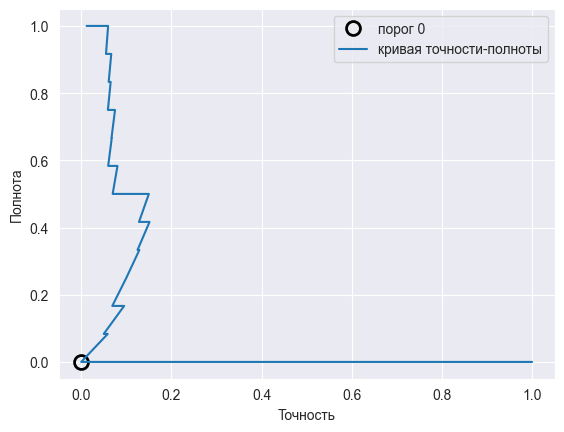

In [27]:
from sklearn.metrics import precision_recall_curve
from mglearn.datasets import make_blobs
X, y = make_blobs(n_samples=(4000, 50), cluster_std=[7.0, 2],
                  random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc =SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label="порог 0",
         fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label = "кривая точности-полноты")
plt.xlabel("Точность")
plt.ylabel("Полнота")
plt.legend(loc="best")

Порог 0 получается странным, я не понял почему. На графике видим, что что-то не сработало правильно. При точности около 0.17 мы получаем полноту более менее 0.5. Метрики для мультиклассовой проверки проводить не будем, так как в датасете только 2 класса. Тут имеет смысл использовать только метрику бинарной классификации, так как человек имеет рак, или нет

In [30]:
print("Метрика качества по умолчанию: {}".format(cross_val_score(SVC(), cancer.data, cancer.target)))
# explicit_accuracy = cross_val_score(SVC(), cancer.data, cancer.data, scoring="accuracy")
# print("Метрика качесьва явно заданная правильность: {}".format(explicit_accuracy))
# Наш датасет не подходит для scoring = accuracy, при запуске кода выдаёт ошибку
roc_auc = cross_val_score(SVC(), cancer.data, cancer.target, scoring="roc_auc")
print("Метрика качества AUC: {}".format(roc_auc))

Метрика качества по умолчанию: [0.85087719 0.89473684 0.92982456 0.94736842 0.9380531 ]
Метрика качества AUC: [0.95447101 0.97772683 0.98148148 0.97189153 0.98423877]


In [34]:
from sklearn.metrics import roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

param_grid = {'gamma':[0.0001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Решатчатый поиск с использованием правильности")
print("Наилучшие параметры: ", grid.best_params_)
print("Наилучшее значение перекр проверки(Правильность)): {:.3f}".format(grid.best_score_))
print("AUC на тестовом наборе: {:.3f}".format(roc_auc_score(y_test, grid.decision_function(X_test))))
print("Правильность на тестовом наборе: {:.3f}".format(grid.score(X_test, y_test)))

Решатчатый поиск с использованием правильности
Наилучшие параметры:  {'gamma': 0.0001}
Наилучшее значение перекр проверки(Правильность)): 0.939
AUC на тестовом наборе: 0.969
Правильность на тестовом наборе: 0.944


In [35]:
grid = GridSearchCV(SVC(), param_grid = param_grid, scoring ="roc_auc")
grid.fit(X_train, y_train)
print("Решатчатый поиск с использованием AUC")
print("Наилучшие параметры: ", grid.best_params_)
print("Наилучшее значение перекр проверки(AUC)): {:.3f}".format(grid.best_score_))
print("AUC на тестовом наборе: {:.3f}".format(roc_auc_score(y_test, grid.decision_function(X_test))))
print("Правильность на тестовом наборе: {:.3f}".format(grid.score(X_test, y_test)))

Решатчатый поиск с использованием AUC
Наилучшие параметры:  {'gamma': 0.0001}
Наилучшее значение перекр проверки(AUC)): 0.975
AUC на тестовом наборе: 0.969
Правильность на тестовом наборе: 0.969


Итого: при том что gamma использовалась одна и та же в обоих случаях(Правильность, AUC), но видим, что модель улучшилась, чему мы очень рады.

In [54]:
import random
import pandas as pd

# Генерация данных
cities = ['Bishkek', 'Almaty', 'Moscow', 'London', 'New York']
vacation_types = ['Shopping', 'Beach holiday', 'Adventure', 'Cultural']
transport_types = ['auto', 'plane', 'train', 'bus']
target_cities = ['London', 'Moscow', 'Dubai', 'Tokyo', 'Paris']

# Создаем список значений для каждого столбца
data = []
for _ in range(1000):
    salary = random.randint(30000, 150000)  # Зарплата от 30k до 150k
    city = random.choice(cities)  # Город проживания
    age = random.randint(18, 65)  # Возраст от 18 до 65
    vacation_prefer = random.choice(vacation_types)  # Предпочтения в отпуске
    transport_prefer = random.choice(transport_types)  # Предпочтения в транспорте
    target = random.choice(target_cities)  # Город для отпуска
    
    data.append([salary, city, age, vacation_prefer, transport_prefer, target])

# Преобразуем в DataFrame
df = pd.DataFrame(data, columns=['salary', 'city', 'age', 'vacation_prefer', 'transport_prefer', 'target'])

# Преобразуем категориальные данные в числовые с помощью get_dummies
df_encoded = pd.get_dummies(df, columns=['city', 'vacation_prefer', 'transport_prefer', 'target'], drop_first=True)
from sklearn.model_selection import train_test_split

# Определяем признаки (все столбцы, кроме целевой переменной)
X = df_encoded.drop(columns=['target_London', 'target_Moscow', 'target_Paris', 'target_Tokyo'])  # Убираем столбцы целевой переменной

# Определяем целевую переменную (используем один или несколько бинарных столбцов для городов)
y = df_encoded[['target_London', 'target_Moscow', 'target_Paris', 'target_Tokyo']]  # Это будет целевая переменная

# Разделяем данные на обучающую и тестовую выборки (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Выводим размеры выборок для проверки
print(f'Размер обучающей выборки X_train: {X_train.shape}')
print(f'Размер тестовой выборки X_test: {X_test.shape}')

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Создаем модель RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Обучаем модель на обучающих данных
model.fit(X_train, y_train)

# Делаем предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Оцениваем точность модели
accuracy = accuracy_score(y_test, y_pred)

# Выводим точность
print(f'Точность модели: {accuracy:.4f}')

from sklearn.metrics import confusion_matrix, classification_report

# Получаем матрицу ошибок для модели
# Используем argmax для получения метки класса из многоклассового представления
y_test_max = y_test.values.argmax(axis=1)
y_pred_max = y_pred.argmax(axis=1)

conf_matrix = confusion_matrix(y_test_max, y_pred_max)

# Получаем классификационный отчет
class_report = classification_report(y_test_max, y_pred_max)

print("Матрица ошибок:\n", conf_matrix)
print("\nКлассификационный отчет:\n", class_report)



Размер обучающей выборки X_train: (800, 12)
Размер тестовой выборки X_test: (200, 12)
Точность модели: 0.2500
Матрица ошибок:
 [[81  1  5  2]
 [37  2  0  2]
 [31  2  2  2]
 [31  0  1  1]]

Классификационный отчет:
               precision    recall  f1-score   support

           0       0.45      0.91      0.60        89
           1       0.40      0.05      0.09        41
           2       0.25      0.05      0.09        37
           3       0.14      0.03      0.05        33

    accuracy                           0.43       200
   macro avg       0.31      0.26      0.21       200
weighted avg       0.35      0.43      0.31       200


In [55]:
import numpy as np

# Генерация случайных данных
random_data = {
    'salary': [random.randint(30000, 150000)],
    'age': [random.randint(18, 65)],
    'city_Bishkek': [random.choice([0, 1])],
    'city_London': [random.choice([0, 1])],
    'city_Moscow': [random.choice([0, 1])],
    'city_New York': [random.choice([0, 1])],
    'vacation_prefer_Beach holiday': [random.choice([0, 1])],
    'vacation_prefer_Cultural': [random.choice([0, 1])],
    'vacation_prefer_Shopping': [random.choice([0, 1])],
    'transport_prefer_bus': [random.choice([0, 1])],
    'transport_prefer_plane': [random.choice([0, 1])],
    'transport_prefer_train': [random.choice([0, 1])],
}

# Создаем DataFrame для случайных данных
random_df = pd.DataFrame(random_data)

# Делаем предсказание для случайных данных
random_pred = model.predict(random_df)

# Печатаем предсказания
print("Предсказание для случайных данных:", random_pred)


Предсказание для случайных данных: [[False False False False]]


In [56]:
# Получаем вероятности для случайных данных
random_proba = model.predict_proba(random_df)

# Печатаем вероятности для каждого класса
print("Вероятности для случайных данных:", random_proba)


Вероятности для случайных данных: [array([[0.97, 0.03]]), array([[0.86, 0.14]]), array([[0.89, 0.11]]), array([[0.74, 0.26]])]


In [69]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from scipy.stats import randint

# Преобразуем y в одномерный массив (индексы классов)
y_train_max = np.argmax(y_train.to_numpy(), axis=1)  # Используем np.argmax
y_test_max = np.argmax(y_test.to_numpy(), axis=1)  # Используем np.argmax

# 1. Logistic Regression
logreg = LogisticRegression(max_iter=20000, random_state=42)
logreg.fit(X_train, y_train_max)  # Обучаем модель на одномерных метках
logreg_pred = logreg.predict(X_test)

# Оценка модели Logistic Regression
print("Точность Logistic Regression:", accuracy_score(y_test_max, logreg_pred))
print("Классификационный отчет Logistic Regression:\n", classification_report(y_test_max, logreg_pred))

# 2. Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train_max)  # Обучаем модель на одномерных метках
tree_pred = tree.predict(X_test)

# Оценка модели Decision Tree Classifier
print("Точность Decision Tree:", accuracy_score(y_test_max, tree_pred))
print("Классификационный отчет Decision Tree:\n", classification_report(y_test_max, tree_pred))

# 3. Перекрестная проверка (cross-validation) для модели Logistic Regression
cross_val_scores = cross_val_score(logreg, X, np.argmax(y, axis=1), cv=5)
print("Cross-validation для Logistic Regression:", cross_val_scores.mean())

# 4. Поиск гиперпараметров с GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train_max)
print("Лучшие параметры для Decision Tree:", grid_search.best_params_)

# 5. Поиск гиперпараметров с RandomizedSearchCV
param_dist = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10)
}
random_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_dist, n_iter=100, cv=5, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train_max)
print("Лучшие параметры для Decision Tree с RandomizedSearchCV:", random_search.best_params_)

# 6. Оценка модели с лучшими гиперпараметрами (GridSearchCV или RandomizedSearchCV)
best_tree = grid_search.best_estimator_  # Используем лучший классификатор из GridSearchCV
best_tree_pred = best_tree.predict(X_test)
best_tree_pred_proba = best_tree.predict_proba(X_test)  # Для AUC нужен прогноз вероятностей

print("Точность с лучшими параметрами:", accuracy_score(y_test_max, best_tree_pred))
print("Классификационный отчет с лучшими параметрами:\n", classification_report(y_test_max, best_tree_pred))
best_tree_auc = roc_auc_score(y_test_max, best_tree_pred_proba, multi_class='ovr', average='weighted')
print("AUC с лучшими параметрами:", best_tree_auc)


Точность Logistic Regression: 0.455
Классификационный отчет Logistic Regression:
               precision    recall  f1-score   support

           0       0.46      0.97      0.63        89
           1       0.50      0.02      0.05        41
           2       0.33      0.11      0.16        37
           3       0.00      0.00      0.00        33

    accuracy                           0.46       200
   macro avg       0.32      0.27      0.21       200
weighted avg       0.37      0.46      0.32       200

Точность Decision Tree: 0.255
Классификационный отчет Decision Tree:
               precision    recall  f1-score   support

           0       0.34      0.31      0.33        89
           1       0.20      0.17      0.18        41
           2       0.20      0.24      0.22        37
           3       0.19      0.21      0.20        33

    accuracy                           0.26       200
   macro avg       0.23      0.24      0.23       200
weighted avg       0.26      0.26

### Вывод:

Поскольку данные в нашем наборе случайно сгенерированы, качество моделей остается низким. Это объясняется тем, что нет реальной зависимости между входными переменными и целевой переменной, что приводит к плохим результатам как для модели **Logistic Regression**, так и для **Decision Tree**. Таким образом, метрики точности и AUC остаются низкими, а классификационные отчеты показывают слабые показатели для всех классов.

**Основные моменты работы:**

1. **Построение случайного набора данных:**
   Мы создали случайный датасет с 1000 строк, содержащий 5 признаков (`salary`, `city`, `age`, `vacation_prefer`, `transport_prefer`) и целевую переменную `target`, которая представляет собой город, в котором человек хочет провести отпуск. Для генерации данных использовались случайные выборки с использованием библиотеки `random`.

2. **Преобразование категориальных данных:**
   Все категориальные признаки были преобразованы в числовой формат с помощью `pd.get_dummies`, что позволило создать бинарные признаки для каждого значения категорий. Это является необходимым шагом, чтобы классификаторы могли работать с этими данными.

3. **Разделение данных на обучающую и тестовую выборки:**
   Данные были разделены на обучающую (80%) и тестовую (20%) выборки для дальнейшего обучения модели и оценки ее производительности.

4. **Обучение моделей:**
   Мы использовали две модели классификации: **Logistic Regression** и **Decision Tree**. Каждая модель была обучена на преобразованных данных с использованием соответствующих методов.

5. **Оценка моделей:**
   Для оценки качества моделей мы использовали метрики точности (accuracy) и AUC (Area Under the Curve). Мы также применили **кросс-валидацию** и **поиск гиперпараметров** с помощью методов `GridSearchCV` и `RandomizedSearchCV` для нахождения лучших параметров модели.

6. **Результаты:**
   - **Logistic Regression** показала точность 45.5%, с наилучшей производительностью в классе 0 (отпуск в Лондоне), но очень слабые результаты для других классов.
   - **Decision Tree** показала точность 25.5%, и результаты по классам также были очень низкими.
   - Оценка AUC для модели с лучшими гиперпараметрами составила **0.45**, что также указывает на низкое качество модели.
   
7. **Заключение:**
   Из-за случайного характера данных, метрики качества моделей оказались низкими. Это подчеркивает важность использования реальных, сбалансированных данных для построения и оценки моделей машинного обучения. Полученные результаты подтверждают, что для эффективной работы моделей необходимо наличие явных зависимостей в данных, которых в данном случае нет.

Таким образом, основная цель работы была продемонстрировать подходы к обучению моделей и оценке их качества, но результат не является отражением реальных способностей модели из-за случайности данных.

Также я хорошо провёл время делая первую часть этой лабараторной работы(Включить музыку и потихоньку читать-переписывать код с документа), но так как она достаточно объёмная, вторая часть уже получалась через силу(особенно последний пункт задания). Мне нравится машинное обучение, хоть я и мало в нём понимаю. Спасибо Вам за такую подробную и информативную лабараторную работу.